In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset (replace filename if necessary)
df = pd.read_csv(next(iter(uploaded)))

# Set seaborn style
sns.set(style="whitegrid")

# Preview data
df.head()


Saving user_behavior_dataset (2).csv to user_behavior_dataset (2).csv


,User_ID,Device_Model,Operating_System,App_Usage_Time,Screen_On_Time,Battery_Drain,Number_of_Apps_Installed,Data_Usage,Age,Gender,User_Behavior_Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


Prepare data



In [2]:
# Convert the 'User_Behavior_Class' column to string type
# This ensures it's treated as categorical for plotting and analysis
df["User_Behavior_Class"] = df["User_Behavior_Class"].astype(str)

# Correlation matrix



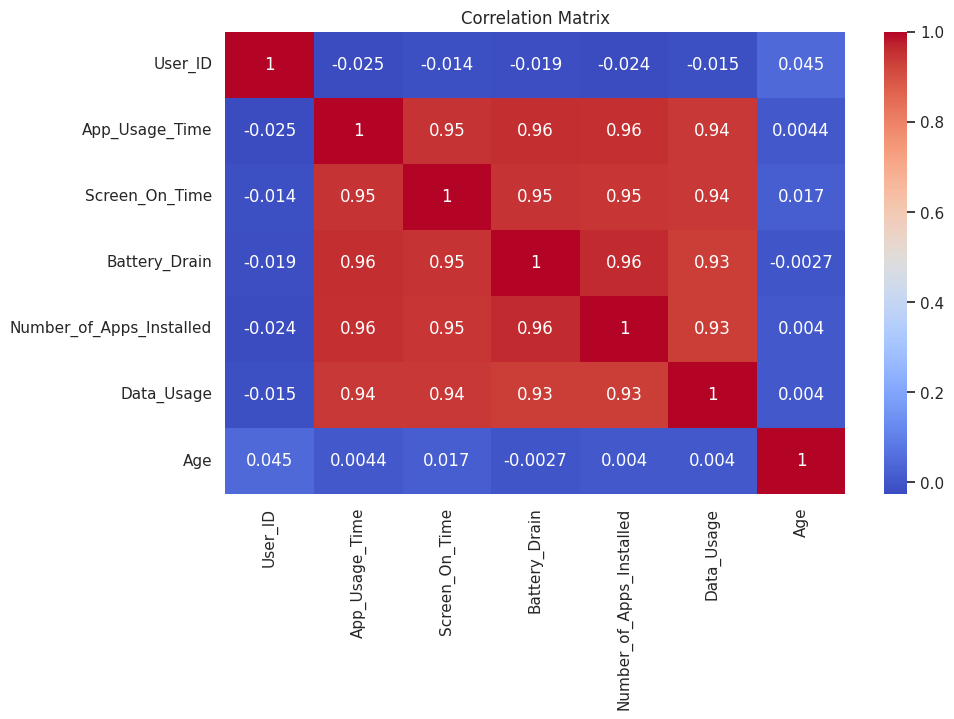

In [3]:
# Create a heatmap to visualize correlations between numeric variables

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



#  Histogram - App Usage Time




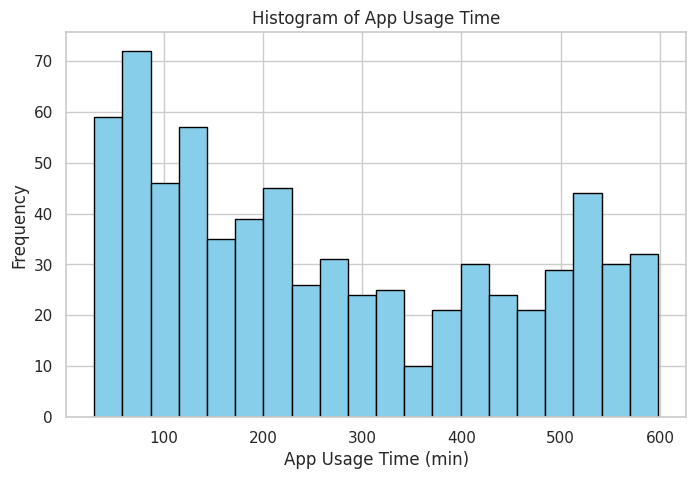

In [5]:
# Plot a histogram to show the distribution of 'App_Usage_Time'
# 20 bins for granularity

plt.figure(figsize=(8, 5))
plt.hist(df['App_Usage_Time'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of App Usage Time")
plt.xlabel("App Usage Time (min)")
plt.ylabel("Frequency")
plt.show()

# Bar Graph - Average Data Usage by Operating System

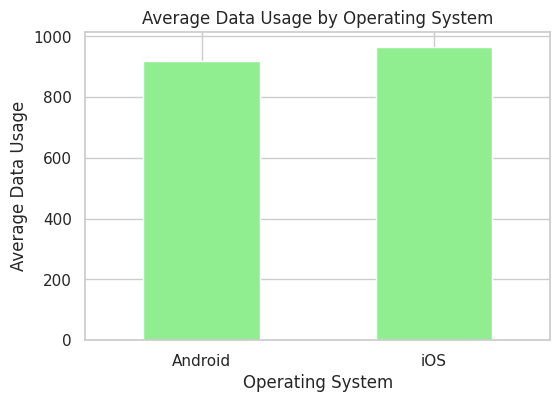

In [6]:
# Group data by 'Operating_System' and compute average 'Data_Usage'
# x-axis shows OS types; y-axis shows average data usage

avg_data = df.groupby("Operating_System")["Data_Usage"].mean()
plt.figure(figsize=(6, 4))
# Create a bar chart to visualize average usage per OS
avg_data.plot(kind='bar', color='lightgreen')
plt.title("Average Data Usage by Operating System")
plt.ylabel("Average Data Usage")
plt.xlabel("Operating System")
plt.xticks(rotation=0)
plt.show()


# Pie Chart - Gender Distribution






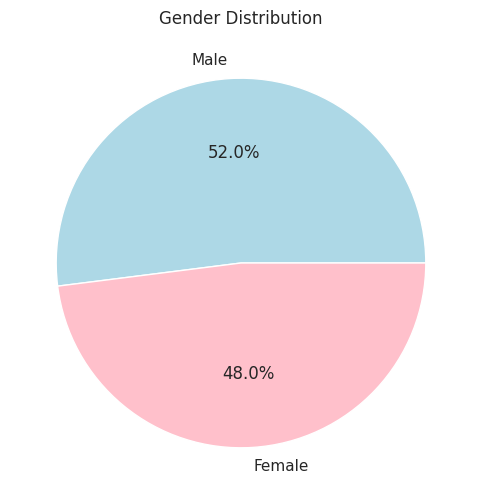

In [7]:
# Count the number of users by gender
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6, 6))
# Plot a pie chart to visualize the gender distribution
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["lightblue", "pink"])
plt.title("Gender Distribution")
plt.show()



# Bar Graph - Number of Users by Behavior Class

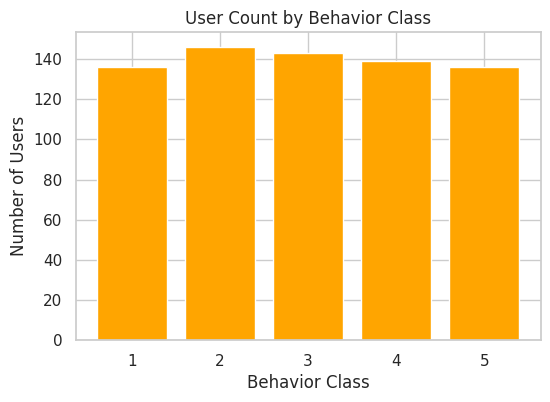

In [8]:
# Count the number of users in each behavior class and sort by class index
behavior_counts = df["User_Behavior_Class"].value_counts().sort_index()
plt.figure(figsize=(6, 4))
# Plot a bar chart showing how many users fall into each class
plt.bar(behavior_counts.index, behavior_counts.values, color='orange')
plt.title("User Count by Behavior Class")
plt.xlabel("Behavior Class")
plt.ylabel("Number of Users")
plt.show()

# Bar Plot - App Usage Time by Age Group

<ipython-input-9-1225e101e841>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_usage = df.groupby("Age_Group")["App_Usage_Time"].mean()


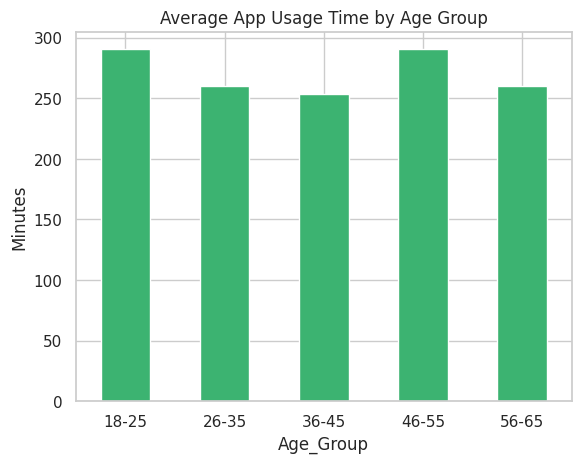

In [9]:
# Create age groups by binning 'Age' into defined ranges
df["Age_Group"] = pd.cut(df["Age"], bins=[18, 25, 35, 45, 55, 65], labels=["18-25", "26-35", "36-45", "46-55", "56-65"])
# Compute the average app usage time per age group
age_usage = df.groupby("Age_Group")["App_Usage_Time"].mean()
# Plot a bar chart to show usage differences across age groups
age_usage.plot(kind='bar', color='mediumseagreen')
plt.title("Average App Usage Time by Age Group")
plt.ylabel("Minutes")
plt.xticks(rotation=0)
plt.show()


# Pie Chart - OS Distribution

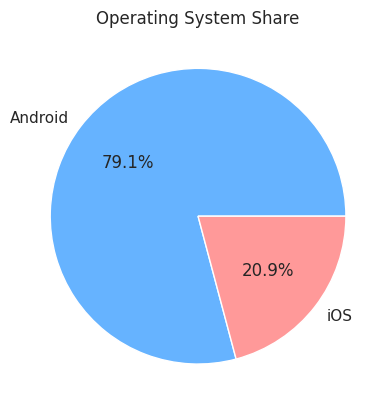

In [10]:
# Count number of users per operating system
# Plot a pie chart showing the share of each operating system in the dataset
os_counts = df["Operating_System"].value_counts()
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', colors=["#66b3ff", "#ff9999"])
plt.title("Operating System Share")
plt.show()

# Average Feature Values by Behavior:Class comparing App_Usage_Time, Data_Usage, and Battery_Drain for each class


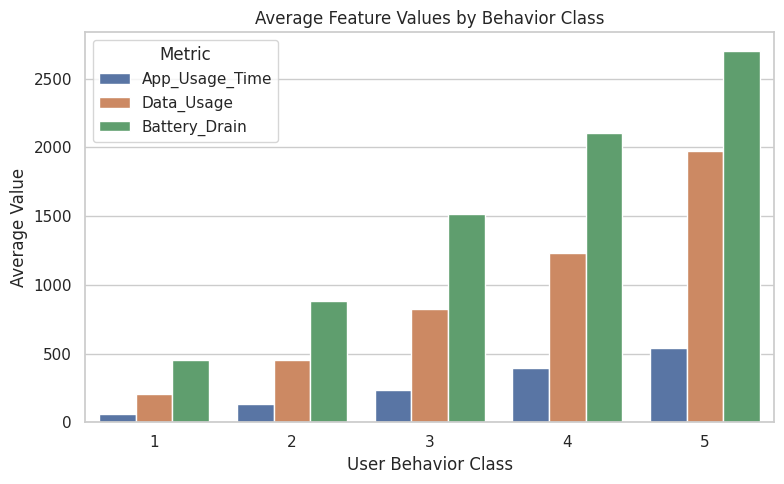

In [11]:
# Calculate average values of selected features by behavior class
# Reshape the data with melt() to make it suitable for seaborn grouped barplot
behavior_df = df.groupby("User_Behavior_Class")[["App_Usage_Time", "Data_Usage", "Battery_Drain"]].mean().reset_index()
behavior_df_melted = behavior_df.melt(
    id_vars="User_Behavior_Class",
    var_name="Metric",
    value_name="Value"
)


# Plot average App Usage Time, Data Usage, and Battery Drain per behavior class

plt.figure(figsize=(8, 5))
sns.barplot(x="User_Behavior_Class", y="Value", hue="Metric", data=behavior_df_melted)
plt.title("Average Feature Values by Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Average Value")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


#Average Screen-On Time by Gender

<ipython-input-12-eaf2034b6d59>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Gender", y="Screen_On_Time", data=df, ci=None)


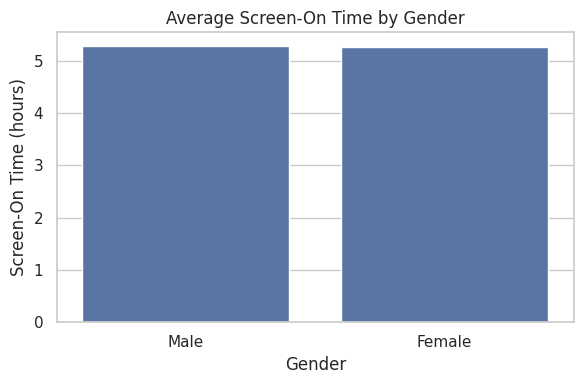

In [12]:

# Plot a bar chart comparing average screen-on time between genders
plt.figure(figsize=(6, 4))
sns.barplot(x="Gender", y="Screen_On_Time", data=df, ci=None)
plt.title("Average Screen-On Time by Gender")
plt.ylabel("Screen-On Time (hours)")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()


# Apps Installed vs Battery Drain

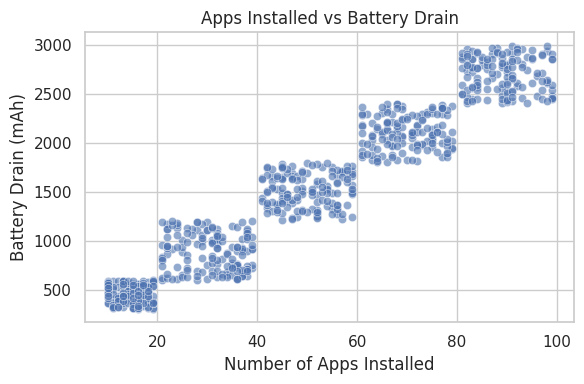

In [ ]:
# Create a scatter plot to explore the relationship between number of installed apps and battery drain
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Number_of_Apps_Installed", y="Battery_Drain", data=df, alpha=0.6)
plt.title("Apps Installed vs Battery Drain")
plt.xlabel("Number of Apps Installed")
plt.ylabel("Battery Drain (mAh)")
plt.tight_layout()
plt.show()

# App Usage vs Data Usage

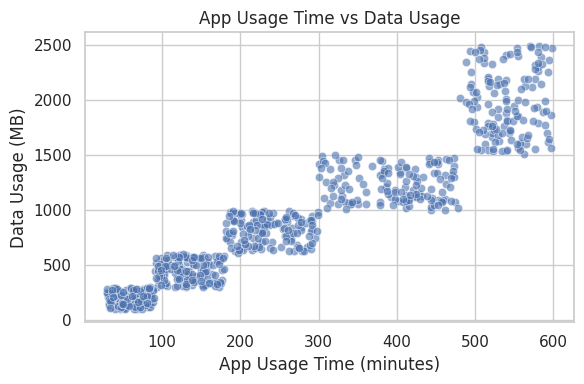

In [ ]:
# Scatter plot showing the relationship between app usage time and data usage
# Helps visualize whether longer usage correlates with higher data consumption
plt.figure(figsize=(6, 4))
sns.scatterplot(x="App_Usage_Time", y="Data_Usage", data=df, alpha=0.6)
plt.title("App Usage Time vs Data Usage")
plt.xlabel("App Usage Time (minutes)")
plt.ylabel("Data Usage (MB)")
plt.tight_layout()
plt.show()
